In [3]:
# Import required libraries
import os
from pydub import AudioSegment, silence 
import matplotlib.pyplot as plt
import numpy as np
import wave

In [59]:
# shows the sound waves for MONO and 16bit
def visualize(path: str,sil=None):
    raw = wave.open(path)
    signal = raw.readframes(-1)
    signal = np.frombuffer(signal, dtype ="int16")
    f_rate = raw.getframerate()
    print(f_rate, len(signal) / f_rate)
    time = np.linspace(
        0, # start
        len(signal) / f_rate,
        num = len(signal)
    )
    plt.figure(1)
    plt.title("Sound Wave")
    plt.xlabel("Time")
    plt.plot(time, signal)
    if sil:
        for i in sil:
            plt.axvline(x=i[0], color='red') 
            plt.axvline(x=i[1], color='yellow')
    plt.show()

16000 2.944


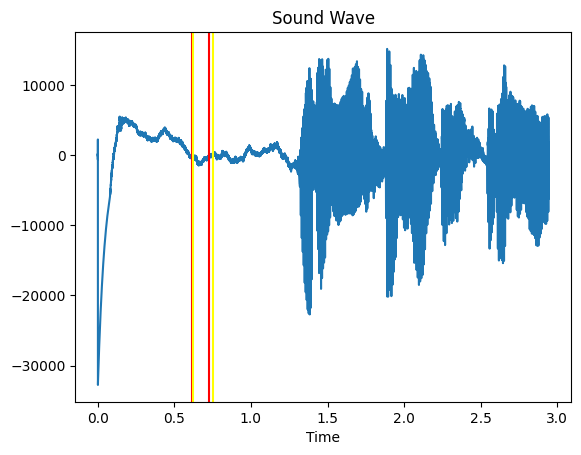

In [67]:
# For mono
# Pass audio path
# file ='../assets/audio01.wav'
# file ='../assets/output.wav'
# file ='../assets/sample.wav'
# file ='../assets/noise.wav'
file ='../assets/output_one_channel.wav'
assert os.path.isfile(file)

myaudio = AudioSegment.from_wav(file)

silenc = silence.detect_silence(myaudio, min_silence_len=10, silence_thresh=-50)
# silenc = silence.detect_silence(myaudio, min_silence_len=10, silence_thresh=-50)
silenc = [((start/1000),(stop/1000)) for start,stop in silenc]
# print(silenc)

visualize(file,silenc)

16000 9.984


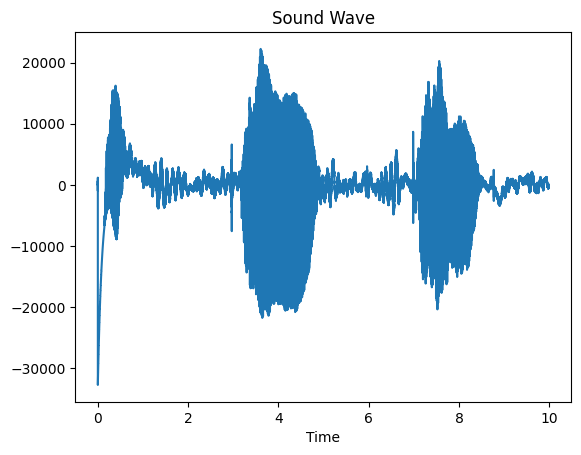

In [70]:
# For stereo
# Pass audio path
file ='../assets/output.wav'
assert os.path.isfile(file)

myaudio = AudioSegment.from_wav(file)
# print(myaudio.channels)
silenc = silence.detect_silence(myaudio, min_silence_len=10, silence_thresh=-500, seek_step=2)
# silenc = silence.detect_silence(myaudio, min_silence_len=10, silence_thresh=-50)
silenc = [((start/1000),(stop/1000)) for start,stop in silenc]
# print(silenc)

visualize(file,silenc)